<a href="https://colab.research.google.com/github/Bhuvanjeet/Sentiment-Analysis-with-tweets-using-NLP/blob/master/sentiment_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Sentiment analysis with tweets**

The dataset contains 1,600,000 (1.6M) tweets extracted using the twitter api . The tweets have been annotated (0 = negative, 2 = neutral, 4 = positive) and they can be used to detect sentiment.

It contains the following 6 fields:

1. target: the polarity of the tweet (0 = negative, 2 = neutral, 4 = positive)

2. ids: The id of the tweet ( 2087)

3. date: the date of the tweet (Sat May 16 23:58:44 UTC 2009)

4. flag: The query (lyx). If there is no query, then this value is NO_QUERY.

5. user: the user that tweeted (robotickilldozr)

6. text: the text of the tweet (Lyx is cool)


To Do : - Detect severity from tweets.


Source:- https://www.kaggle.com/kazanova/sentiment140


**Techniques Used : - NLP (Natural Language Processing)**

**1- Text Preprocessing using Stemming**

**2- Vectorization**

**3- TF - IDF (Term Frequency - Inverse Document Frequency)**

**4- Machine Learning - Naive Bayes Classifier**

**5- Data Pipeline for this whole process**



**Exploratory Data Analysis - EDA**

In [0]:
import pandas as pd
import pandas.testing as tm
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
%matplotlib inline

In [2]:
%tensorflow_version 2.x
import tensorflow as tf
device_name = tf.test.gpu_device_name()
if device_name != '/device:GPU:0':
  raise SystemError('GPU device not found')
print('Found GPU at: {}'.format(device_name))

Found GPU at: /device:GPU:0


In [0]:
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials
# Authenticate and create the PyDrive client.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [0]:
link='https://drive.google.com/open?id=1ionaQ1uGUY3JjmJAGVqZdqFoxE1R2GSV'

In [5]:
fluff, id = link.split('=')
print (id) # Verify that you have everything after '='

1ionaQ1uGUY3JjmJAGVqZdqFoxE1R2GSV


In [0]:
downloaded = drive.CreateFile({'id':id}) 
downloaded.GetContentFile('twitterdataset.csv')  

In [0]:
df=pd.read_csv('twitterdataset.csv',encoding='latin-1')

In [8]:
df.head()

,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, that's a bummer. You shoulda got David Carr of Third Day to do it. ;D"
0,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
1,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
2,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
3,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."
4,0,1467811372,Mon Apr 06 22:20:00 PDT 2009,NO_QUERY,joy_wolf,@Kwesidei not the whole crew


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599999 entries, 0 to 1599998
Data columns (total 6 columns):
 #   Column                                                                                                               Non-Null Count    Dtype 
---  ------                                                                                                               --------------    ----- 
 0   0                                                                                                                    1599999 non-null  int64 
 1   1467810369                                                                                                           1599999 non-null  int64 
 2   Mon Apr 06 22:19:45 PDT 2009                                                                                         1599999 non-null  object
 3   NO_QUERY                                                                                                             1599999 non-null  object
 4   _

In [0]:
df.iloc[0]=df.columns   #transferring data in column heading to first row of dataframe

In [11]:
df.head()

,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, that's a bummer. You shoulda got David Carr of Third Day to do it. ;D"
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
2,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
3,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."
4,0,1467811372,Mon Apr 06 22:20:00 PDT 2009,NO_QUERY,joy_wolf,@Kwesidei not the whole crew


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599999 entries, 0 to 1599998
Data columns (total 6 columns):
 #   Column                                                                                                               Non-Null Count    Dtype 
---  ------                                                                                                               --------------    ----- 
 0   0                                                                                                                    1599999 non-null  object
 1   1467810369                                                                                                           1599999 non-null  object
 2   Mon Apr 06 22:19:45 PDT 2009                                                                                         1599999 non-null  object
 3   NO_QUERY                                                                                                             1599999 non-null  object
 4   _

In [0]:
df=df.rename(columns={'0': 'target','1467810369':'ids','Mon Apr 06 22:19:45 PDT 2009':'date','NO_QUERY':'flag','_TheSpecialOne_':'user',"@switchfoot http://twitpic.com/2y1zl - Awww, that's a bummer.  You shoulda got David Carr of Third Day to do it. ;D":'text'})

In [14]:
df.head()

,target,ids,date,flag,user,text
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
2,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
3,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."
4,0,1467811372,Mon Apr 06 22:20:00 PDT 2009,NO_QUERY,joy_wolf,@Kwesidei not the whole crew


In [15]:
df['target'].unique()

array(['0', 0, 4], dtype=object)

In [0]:
df['target']=df['target'].astype(int)

In [17]:
df['target'].unique()

array([0, 4])

In [0]:
df['text_length']=df['text'].apply(len)

In [19]:
df.head()

,target,ids,date,flag,user,text,text_length
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t...",115
1,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...,89
2,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire,47
3,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all....",111
4,0,1467811372,Mon Apr 06 22:20:00 PDT 2009,NO_QUERY,joy_wolf,@Kwesidei not the whole crew,29


Since we have to estimate sentiment from text, there is no need of columns such 
as ids,date,flag and user. So we will drop these columns from our dataframe.

In [0]:
df.drop(['ids','date','flag','user'],axis=1,inplace=True)

In [21]:
df.head()

,target,text,text_length
0,0,"@switchfoot http://twitpic.com/2y1zl - Awww, t...",115
1,0,@Kenichan I dived many times for the ball. Man...,89
2,0,my whole body feels itchy and like its on fire,47
3,0,"@nationwideclass no, it's not behaving at all....",111
4,0,@Kwesidei not the whole crew,29


In [22]:
#checking for duplicates
sum(df.duplicated())

16309

In [0]:
#data cleaning
#dropping duplicates from the dataframe
df.drop_duplicates(inplace=True)

In [24]:
sum(df.duplicated())

0

In [25]:
#checking for null values
df.isnull().sum()

target         0
text           0
text_length    0
dtype: int64

In [26]:
df.groupby('target').describe()

text_length                                                     
             count       mean        std  min   25%   50%    75%    max
target                                                                 
0         790184.0  74.858743  36.459797  6.0  44.0  70.0  105.0  359.0
4         793506.0  74.099728  35.974273  6.0  44.0  69.0  103.0  374.0

In [27]:
df.head()

,target,text,text_length
0,0,"@switchfoot http://twitpic.com/2y1zl - Awww, t...",115
1,0,@Kenichan I dived many times for the ball. Man...,89
2,0,my whole body feels itchy and like its on fire,47
3,0,"@nationwideclass no, it's not behaving at all....",111
4,0,@Kwesidei not the whole crew,29


**Data Visualization**

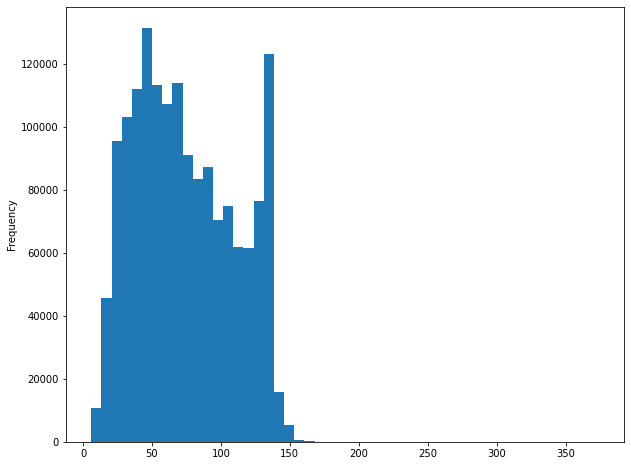

In [31]:
plt.figure(figsize=(10,8))
df['text_length'].plot.hist(bins=50)

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7fb8f16e9908>,
      dtype=object)

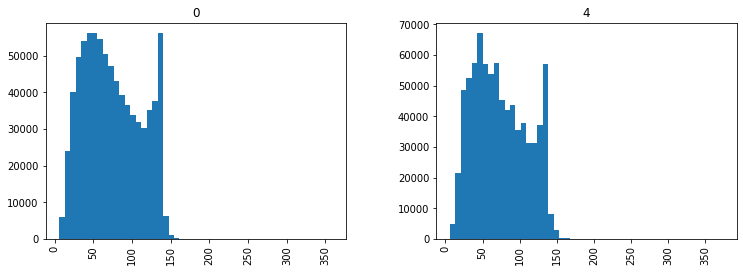

In [32]:
#text_length by target
df.hist(column='text_length',by='target',bins=50,figsize=(12,4))

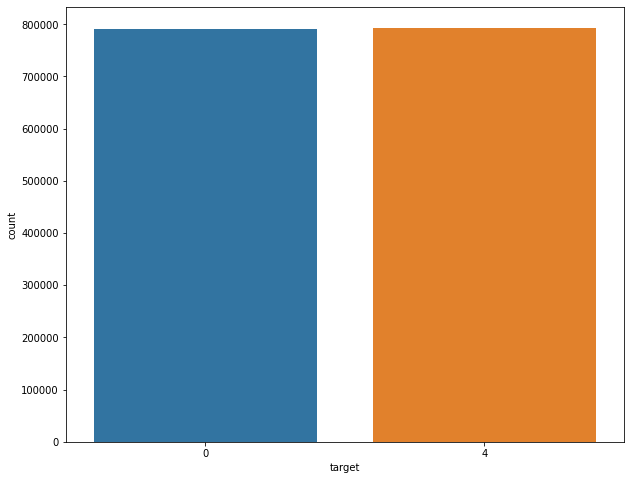

In [33]:
plt.figure(figsize=(10,8))
sns.countplot(x='target',data=df)

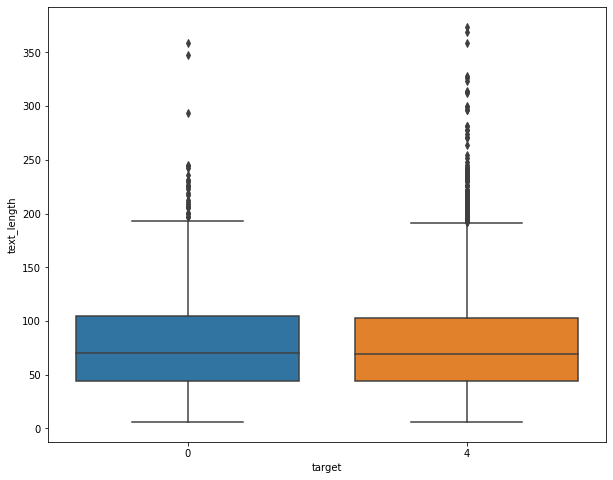

In [34]:
plt.figure(figsize=(10,8))
sns.boxplot(x='target',y='text_length',data=df)

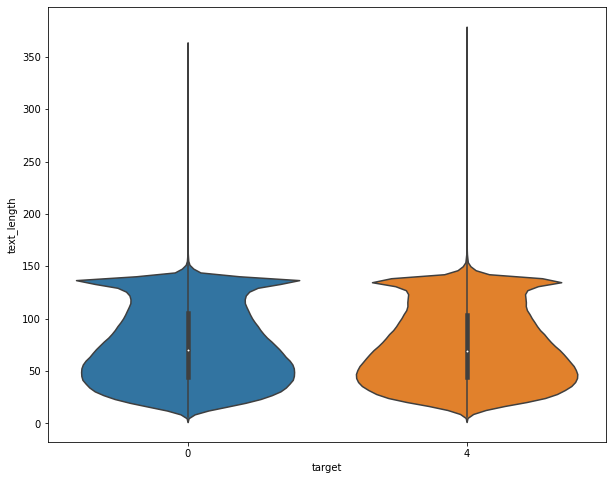

In [35]:
plt.figure(figsize=(10,8))
sns.violinplot(x='target',y='text_length',data=df)

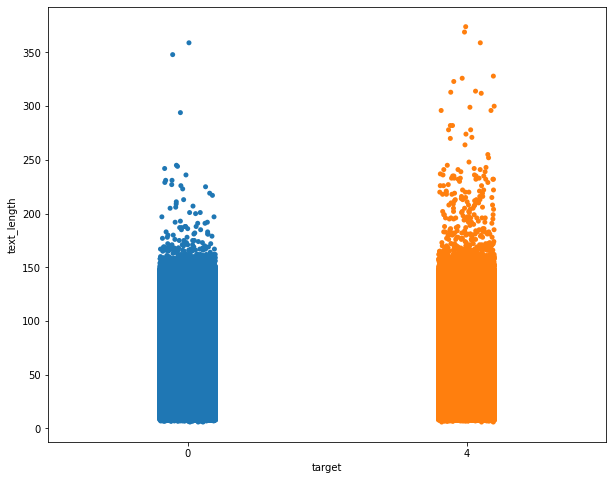

In [36]:
plt.figure(figsize=(10,8))
sns.stripplot(x='target',y='text_length',data=df,jitter=True)

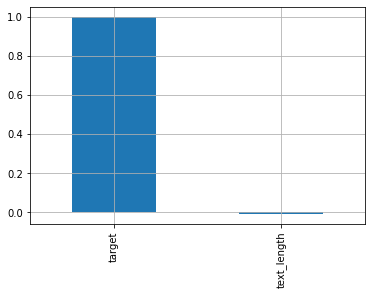

In [37]:
df.corrwith(df['target']).plot.bar(grid=True)

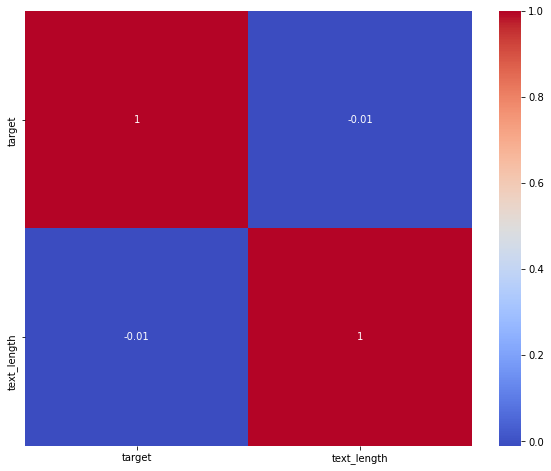

In [38]:
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(),cmap='coolwarm',annot=True)

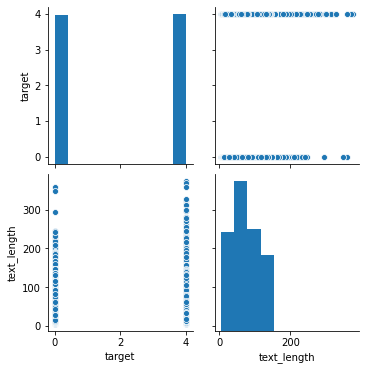

In [40]:
sns.pairplot(df)

**Analysis from Data Visualization**

From the above graphs, we can say that text length has no correlation with the text.

**Data Cleaning and Text Pre-processing**

In [0]:
import string 
import nltk
import re

In [29]:
nltk.download_shell()

NLTK Downloader
---------------------------------------------------------------------------
    d) Download   l) List    u) Update   c) Config   h) Help   q) Quit
---------------------------------------------------------------------------
Downloader> d

Download which package (l=list; x=cancel)?
  Identifier> stopwords
      Package stopwords is already up-to-date!

---------------------------------------------------------------------------
    d) Download   l) List    u) Update   c) Config   h) Help   q) Quit
---------------------------------------------------------------------------
Downloader> q


In [0]:
from nltk.stem import SnowballStemmer
from nltk.corpus import stopwords

In [0]:
from nltk.stem.porter import * 
stemmer1 = PorterStemmer() 

In [0]:
stop_words = stopwords.words("english")
stemmer = SnowballStemmer("english")

In [0]:
TEXT_CLEANING_RE = "@\S+|https?:\S+|http?:\S|[^A-Za-z0-9]+"

In [0]:
def text_preprocess(tweet,stem=False):
  # Remove link,user and special characters
    tweet = re.sub(TEXT_CLEANING_RE, ' ', str(tweet).lower()).strip()
    tokens = []
    for token in tweet.split():
        if token not in stop_words:      #to remove very common words i.e. stopwords
            if stem:
                tokens.append(stemmer.stem(token))    #SnowballStemmer()
            else:
                tokens.append(token)
    
    for i in tokens:
      stemmer1.stem(i)      #PorterStemmer()

    return tokens           #returns a list of tokens(lemmas)

In [0]:
df['text_preprocessed']=df['text'].apply(lambda x:text_preprocess(x))

In [36]:
df.head()

,target,text,text_length,text_preprocessed
0,0,"@switchfoot http://twitpic.com/2y1zl - Awww, t...",115,"[awww, bummer, shoulda, got, david, carr, thir..."
1,0,@Kenichan I dived many times for the ball. Man...,89,"[dived, many, times, ball, managed, save, 50, ..."
2,0,my whole body feels itchy and like its on fire,47,"[whole, body, feels, itchy, like, fire]"
3,0,"@nationwideclass no, it's not behaving at all....",111,"[behaving, mad, see]"
4,0,@Kwesidei not the whole crew,29,"[whole, crew]"


**Data Visualization**

In [0]:
df1=df.copy(deep=True)

In [0]:
from mosestokenizer import MosesDetokenizer
from nltk.tokenize.treebank import TreebankWordDetokenizer 

In [0]:
df1['detoken']=df1['text_preprocessed'].apply(lambda x:TreebankWordDetokenizer().detokenize(x))

In [0]:
from wordcloud import WordCloud 

Most common words in the entire dataset:

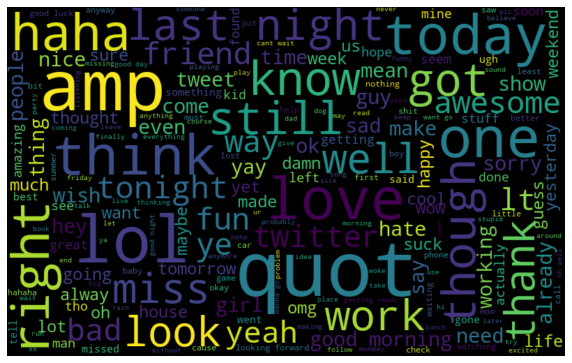

In [62]:
all_words = ' '.join([text for text in df1['detoken']])
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(all_words) 
plt.figure(figsize=(10, 7)) 
plt.imshow(wordcloud, interpolation="bilinear") 
plt.axis('off') 
plt.show()

Most common words in the dataset for Positive tweets.

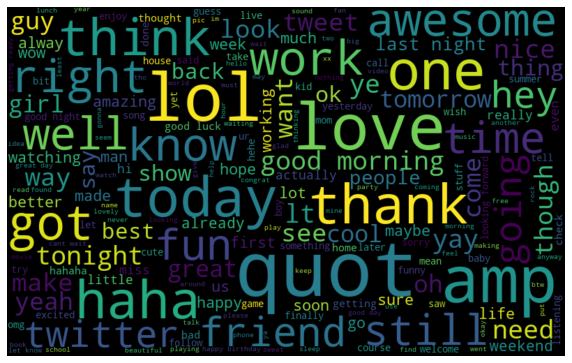

In [63]:
positive_words =' '.join([text for text in df1['detoken'][df1['target'] == 4]]) 
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(positive_words)
plt.figure(figsize=(10, 7)) 
plt.imshow(wordcloud, interpolation="bilinear") 
plt.axis('off') 
plt.show()

Most common words in the dataset for Negative tweets.

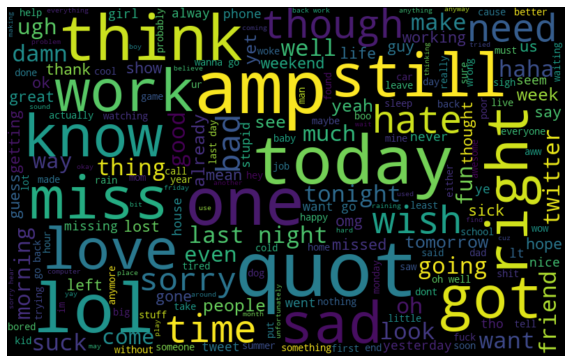

In [64]:
negative_words =' '.join([text for text in df1['detoken'][df1['target'] == 0]]) 
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(negative_words)
plt.figure(figsize=(10, 7)) 
plt.imshow(wordcloud, interpolation="bilinear") 
plt.axis('off') 
plt.show()

**Vectorization**

Now, we'll convert each message, represented as a list of tokens (lemmas) above, into a vector that machine learning models can understand.

We'll do that in three steps using the **bag-of-words model**:

1- Count how many times does a word occur in each message (Known as term frequency)

2- Weigh the counts, so that frequent tokens get lower weight (inverse document frequency)

3- Normalize the vectors to unit length, to abstract from the original text length (L2 norm)

In [0]:
from sklearn.feature_extraction.text import CountVectorizer
#converts a collection of text documents to a matrix of token counts

In [38]:
bow_transformer = CountVectorizer(analyzer=text_preprocess).fit(df['text_preprocessed'])  #Bag-of-Words (bow) transformed object
#There are a lot of arguments and parameters that can be passed to the CountVectorizer. 
#In this case we will just specify the analyzer to be our own previously defined function
print(len(bow_transformer.vocabulary_))  # Print total number of vocab words

335507


In [0]:
text_bow = bow_transformer.transform(df['text_preprocessed'])

In [40]:
#Since there are so many messages, we can expect a lot of zero counts for the presence of that word in that document.
#Because of this, SciKit Learn will output a Sparse Matrix
print('Shape of Sparse Matrix: ', text_bow.shape)
print('Amount of Non-Zero occurences: ', text_bow.nnz)

Shape of Sparse Matrix:  (1583690, 335507)
Amount of Non-Zero occurences:  11158580


In [41]:
sparsity = (100.0 * text_bow.nnz / (text_bow.shape[0] * text_bow.shape[1]))
print('sparsity: {}'.format(round(sparsity)))

sparsity: 0


**Term frequency - Inverse document frequency (TF-IDF)**

TF-IDF weight is a statistical measure used to evaluate how important a word is to a document in a collection or corpus. The importance increases proportionally to the number of times a word appears in the document but is offset by the frequency of the word in the corpus.

In [0]:
from sklearn.feature_extraction.text import TfidfTransformer
tfidf_transformer = TfidfTransformer().fit(text_bow)

In [0]:
text_tfidf = tfidf_transformer.transform(text_bow)   #transforming the entire bag-of-words corpus into TF-IDF corpus

In [44]:
print(text_tfidf.shape)

(1583690, 335507)


**Machine Learning Model Training**

**Train and Test Split (80:20)**

In [0]:
from sklearn import preprocessing
X=text_tfidf
X=preprocessing.normalize(X,norm='l2')

In [0]:
#X=text_tfidf
y=df['target']
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=101)

In [47]:
#feature scaling
from sklearn.preprocessing import StandardScaler   #or you can use MaxAbsScaler
scaler=StandardScaler(with_mean=False)             #'with_mean=False' since X is a sparse matrix
scaler.fit(X)

StandardScaler(copy=True, with_mean=False, with_std=True)

**Naive Bayes Classifier**

In [0]:
from sklearn.naive_bayes import MultinomialNB

In [0]:
model_nb = MultinomialNB().fit(X_train,y_train)

In [0]:
predictions_nb = model_nb.predict(X_test)

In [51]:
# model evaluation
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score
print('Confusion Matrix:\n',confusion_matrix(y_test,predictions_nb))
print('Classification Report:\n',classification_report(y_test,predictions_nb,digits=6))
print('\n Accuracy score:',accuracy_score(y_test,predictions_nb))

Confusion Matrix:
 [[121472  35983]
 [ 39660 119623]]
Classification Report:
               precision    recall  f1-score   support

           0   0.753866  0.771471  0.762567    157455
           4   0.768756  0.751009  0.759779    159283

    accuracy                       0.761181    316738
   macro avg   0.761311  0.761240  0.761173    316738
weighted avg   0.761354  0.761181  0.761165    316738


 Accuracy score: 0.7611811655058756


**Creating a Data Pipeline**

In this case, we will use SciKit Learn's pipeline capabilities to store a pipeline of workflow. This will allow us to set up all the transformations that we will do to the data for future use.

In [0]:
from sklearn.pipeline import Pipeline

In [0]:
pipeline = Pipeline([
    ('bow', CountVectorizer(analyzer=text_preprocess)),  # strings to token integer counts
    ('tfidf', TfidfTransformer()),  # integer counts to weighted TF-IDF scores
    ('classifier', MultinomialNB()),  # train on TF-IDF vectors w/ Naive Bayes classifier
])

Now we can directly pass message text data and the pipeline will do our pre-processing for us! We can treat it as a model/estimator API.

In [54]:
pipeline.fit(X_train,y_train)

Pipeline(memory=None,
         steps=[('bow',
                 CountVectorizer(analyzer=<function text_preprocess at 0x7f657db50f28>,
                                 binary=False, decode_error='strict',
                                 dtype=<class 'numpy.int64'>, encoding='utf-8',
                                 input='content', lowercase=True, max_df=1.0,
                                 max_features=None, min_df=1,
                                 ngram_range=(1, 1), preprocessor=None,
                                 stop_words=None, strip_accents=None,
                                 token_pattern='(?u)\\b\\w\\w+\\b',
                                 tokenizer=None, vocabulary=None)),
                ('tfidf',
                 TfidfTransformer(norm='l2', smooth_idf=True,
                                  sublinear_tf=False, use_idf=True)),
                ('classifier',
                 MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True))],
         verbose=False)

In [0]:
predictions_pipeline = pipeline.predict(X_test)

In [56]:
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score
print('Confusion Matrix:\n',confusion_matrix(y_test,predictions_pipeline))
print('Classification Report:\n',classification_report(y_test,predictions_pipeline,digits=6))
print('\n Accuracy score:',accuracy_score(y_test,predictions_pipeline))

Confusion Matrix:
 [[123232  34223]
 [ 40275 119008]]
Classification Report:
               precision    recall  f1-score   support

           0   0.753680  0.782649  0.767892    157455
           4   0.776657  0.747148  0.761617    159283

    accuracy                       0.764796    316738
   macro avg   0.765169  0.764899  0.764754    316738
weighted avg   0.765235  0.764796  0.764736    316738


 Accuracy score: 0.764796140658841


**Results and Conclusion**

In [57]:
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score
print('Results from normal Workflow:\n')
print('Confusion Matrix:\n',confusion_matrix(y_test,predictions_nb))
print('Classification Report:\n',classification_report(y_test,predictions_nb,digits=6))
print('\n Accuracy score:',accuracy_score(y_test,predictions_nb))

from sklearn.metrics import confusion_matrix,classification_report,accuracy_score
print('Results from using Data Pipelin approach:\n')
print('Confusion Matrix:\n',confusion_matrix(y_test,predictions_pipeline))
print('Classification Report:\n',classification_report(y_test,predictions_pipeline,digits=6))
print('\n Accuracy score:',accuracy_score(y_test,predictions_pipeline))

Results from normal Workflow:

Confusion Matrix:
 [[121472  35983]
 [ 39660 119623]]
Classification Report:
               precision    recall  f1-score   support

           0   0.753866  0.771471  0.762567    157455
           4   0.768756  0.751009  0.759779    159283

    accuracy                       0.761181    316738
   macro avg   0.761311  0.761240  0.761173    316738
weighted avg   0.761354  0.761181  0.761165    316738


 Accuracy score: 0.7611811655058756
Results from using Data Pipelin approach:

Confusion Matrix:
 [[123232  34223]
 [ 40275 119008]]
Classification Report:
               precision    recall  f1-score   support

           0   0.753680  0.782649  0.767892    157455
           4   0.776657  0.747148  0.761617    159283

    accuracy                       0.764796    316738
   macro avg   0.765169  0.764899  0.764754    316738
weighted avg   0.765235  0.764796  0.764736    316738


 Accuracy score: 0.764796140658841


From the above results, we see that there is not much difference in both the strategies but we get slightly better accuracy from Pipelining (76.479%) , so it is more preferred.